In [2]:
##Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy.optimize as opt

In [3]:
#Loading the data
data = scipy.io.loadmat('data/ex3data1.mat')

In [4]:
print(type(data))
print(data.keys())

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [5]:
X,y = data["X"],data["y"]

In [6]:
print(X.shape)
print(y.shape)

(5000, 400)
(5000, 1)


In [16]:
img1 = X[4000]

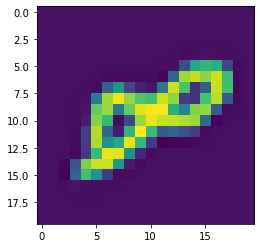

In [17]:
plt.imshow(img1.reshape(20,20))


In [18]:
####Sigmoid function
def sigmoid(z):
    S = 1/(1+np.exp(-z))
    
    return S

In [20]:
X = np.c_[np.ones((X.shape[0],1)),X]
X.shape

(5000, 401)

In [72]:
def costfunc_reg(Theta,X,y,lambd):
    Theta = Theta.reshape(X.shape[1],1)
    m = X.shape[0]
    grads = np.zeros(Theta.shape)
    
    Z = np.dot(X,Theta)
    
    A = sigmoid(Z)
    #+ (lambd/2*m)*np.linalg.norm(Theta[1:,:]**2)
    J = - (np.dot(y.T,np.log(A)) + (np.dot((1-y.T),np.log(1-A))))/m 
    J = J + np.sum(Theta[1:,:]**2)*(lambd/(2*m))
    
    grads = np.dot((A-y).T,X).T/m
    
    grads[1:,:]= grads[1:,:] + (lambd/m)*Theta[1:,:]
    
    return J
    
    

In [73]:
def gradientReg(Theta,X,y,lambd):
    m = X.shape[1]
    Theta = Theta.reshape(X.shape[1],1)
    grads = np.zeros(Theta.shape)
    Z = np.dot(X,Theta)
    
    A = sigmoid(Z)
    
    #J = - (np.dot(y.T,np.log(A)) + (np.dot((1-y.T,np.log(1-A)))))/m + (lambd/2*m)*np.linalg.norm(Theta[1:,:])
    
    grads = np.dot((A-y).T,X).T/m
    
    grads[1:,:]= grads[1:,:] + (lambd/m)*Theta[1:,:]
    
    return grads

In [74]:
(y==1).astype(int)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [75]:
num_labels=10
all_theta = np.zeros((num_labels,X.shape[1]))
learningrate=0.1
for c in range(num_labels):
    print(c)
    result = opt.fmin_tnc(func=costfunc_reg,x0=all_theta[c,:],fprime=gradientReg ,args=(X,(y==c+1).astype(int),learningrate))
    print(result[0])
    all_theta[c,:] = result[0].reshape(all_theta[c,:].shape)

0
[-3.07833960e+00  0.00000000e+00  0.00000000e+00  1.40739213e-04
 -1.30160553e-03 -1.41481667e-03  3.17308250e-03 -3.55883376e-02
 -1.26441998e-02  1.27084719e-03  3.30841080e-04  1.12810007e-05
  6.81896722e-04  3.20791307e-03  1.67841589e-03  5.47738802e-04
  4.63256139e-04  4.15085329e-05 -7.13786745e-06  6.06021335e-11
  0.00000000e+00  6.51911351e-12  2.36029042e-06 -1.68642521e-03
  1.53061775e-02  1.71134882e-02  3.85743721e-03 -5.07310230e-02
 -1.46509851e-02  9.74209277e-03 -4.51644221e-03 -3.89503018e-04
 -7.98964306e-03 -3.40567934e-02 -1.02599662e-02  5.00970458e-03
  4.54397424e-03  1.32234568e-02  1.44323237e-02 -1.42296831e-04
  5.00868957e-05 -5.49458192e-11 -5.48074677e-04  8.07375981e-04
  5.18665890e-02  9.00566989e-02  1.47000553e-01  1.81539736e-01
 -9.74270507e-03 -8.44579559e-02 -1.26920395e-03 -3.43661079e-02
 -6.67255948e-03 -1.59837485e-01 -2.89434609e-01 -3.17417229e-01
 -8.90880479e-02  6.87126430e-02  6.57998802e-02 -6.68151573e-04
  3.89813414e-04 -2.764

[-5.71115319e+00  0.00000000e+00  0.00000000e+00 -5.19098092e-05
 -2.93933143e-03  4.63481825e-02  3.39054142e-01 -1.06701849e-01
  9.94196865e-03  6.12649904e-02  2.99262746e-03  2.59499051e-03
 -4.01175796e-02 -1.21300652e-01  1.63427242e-01  2.33606588e-01
 -1.52973089e-02 -1.53054429e-03  2.95866041e-05  8.23484006e-06
  0.00000000e+00 -2.32985582e-08  1.14277426e-05 -2.29340818e-04
  9.11013870e-03 -4.93275529e-02 -1.07503531e+00 -1.86519589e+00
 -1.56455560e+00 -9.33111295e-01 -1.12356484e-02 -4.92330768e-03
  4.87704850e-01  1.31605796e+00 -1.86451035e+00 -2.59814303e+00
  1.10513118e-01 -7.86347843e-02 -1.39434974e-01 -1.68446361e-02
  2.22678083e-03  2.10438332e-07 -1.75615160e-03 -8.23584024e-03
  2.06519751e-01  1.99770823e+00  2.90739477e+00  1.74429091e+00
  2.35576131e+00 -3.23628859e-01  4.64408355e-03 -5.15766003e-01
 -2.10197126e+00  1.56488578e-01  7.38361288e-01  1.75645712e+00
  1.85679879e+00  1.54414406e+00  4.06043546e+00  1.05112050e-01
 -1.53190888e-02 -7.47022

[ 4.44856607e-01  0.00000000e+00  0.00000000e+00 -2.45143811e-07
  4.91214539e-04 -6.03002755e-03 -5.31967021e-02  2.09388431e-03
 -4.59225639e-03 -2.66055817e-03  2.88824708e-03  2.45375288e-04
  2.55186376e-03  2.00213559e-02 -1.06261795e-01 -1.58418128e-01
  1.38227748e-02  9.58784975e-04 -2.00558720e-05 -6.69818562e-06
  0.00000000e+00 -1.39570316e-07 -2.78139024e-05 -1.40904430e-03
  1.57416802e-02  2.79187994e-02 -1.37745164e-02  5.13684132e-02
 -5.55280040e-03 -1.11952894e-02 -6.30970261e-02  8.19286935e-03
 -1.12698320e-02 -1.63249901e-01  1.18236588e+00  1.75276567e+00
 -1.46159949e-01 -4.12100724e-02 -2.17237027e-02  8.80240633e-04
 -6.46776447e-06  1.25342092e-06  9.94134299e-05  2.29361159e-02
 -1.92440862e-01 -7.23529099e-01 -1.26596190e+00 -1.76259993e+00
 -4.46652067e-01 -1.50442085e-01  3.15122149e-01  7.09263778e-02
 -3.81234589e-01 -1.15010727e+00  1.42481136e+00  1.85692595e+00
 -2.44014678e+00 -3.40224190e-01  1.00841944e-01 -1.17576603e-02
  1.03559225e-03  4.34285

[-2.28860692e+00  0.00000000e+00  0.00000000e+00 -7.23103408e-06
 -2.21730443e-04  3.17267306e-03  2.05461365e-02  1.33214650e-01
  1.22682157e-02 -4.40471537e-03 -3.47267994e-03 -1.20173919e-03
  5.71698417e-04  2.28356951e-03  9.05565099e-04 -2.42354377e-04
  1.61259012e-05  3.84739329e-09 -1.11411384e-09  1.23177710e-10
  0.00000000e+00  5.46015890e-11 -6.41135026e-09  8.13459889e-05
  3.08556163e-03 -4.63034152e-02 -4.04656093e-01  1.43967775e-01
  7.35737985e-02 -3.84243410e-02 -9.78389685e-02  9.46473195e-03
 -4.68911779e-02 -1.09710357e-01 -2.58759425e-02  3.86484984e-02
  1.75497479e-02  2.21803553e-02  1.11042444e-02  3.23511267e-04
  2.13465653e-03 -4.32231673e-10 -9.36254893e-08 -2.07394305e-03
  1.55008860e-02  5.59687740e-02  5.24091260e-01 -5.25060555e-02
  2.28365579e+00  3.94843999e+00  3.19165893e+00  1.42795465e+00
  1.93864071e+00  9.09592368e-01 -5.42512143e-01 -1.18445462e+00
 -1.25157704e+00 -6.78200334e-01 -3.60824785e-01 -7.77063711e-02
 -8.30660317e-03 -2.49130

[-5.62518726e+00  0.00000000e+00  0.00000000e+00 -4.43695100e-07
  4.92715000e-05 -4.24409259e-04 -7.88961754e-03  9.19142495e-03
  7.44656305e-03  8.75395607e-03 -3.15077647e-04 -1.05115930e-04
  1.77630273e-03  1.49910247e-03  1.42654019e-02  3.62618016e-02
  1.96499009e-02 -1.17551635e-03 -1.61188240e-06 -1.84626618e-07
  0.00000000e+00 -1.49230871e-09 -1.50554892e-07  6.42745277e-06
 -2.79760079e-04  2.52977384e-03  4.32636438e-02 -2.19605470e-01
 -1.42471468e-01 -9.20748735e-02 -9.68509664e-03 -2.12347405e-05
 -7.50333314e-02 -4.30386446e-03 -1.07164143e-01 -3.95223884e-01
 -2.24670380e-01  3.93615866e-02  5.12675277e-02 -1.71557703e-02
 -1.94922789e-02  1.34733889e-08 -2.08724567e-07 -6.78314221e-05
  3.66568922e-03 -3.48298456e-02 -2.72534173e-01  7.04754206e-02
 -1.39056020e+00 -4.66428211e+00  5.30402527e-01  1.21476611e+00
  2.33281189e-02  2.26896007e-01  1.74394397e+00  1.33091944e+00
 -9.49824814e-01 -7.23863927e-01 -1.48968846e+00  2.39005710e-01
  3.56090218e-01  4.60666

In [76]:
all_theta.shape

(10, 401)

In [77]:
X.shape

(5000, 401)

In [78]:
pred = np.dot(X,all_theta.T)

In [79]:
pred.shape

(5000, 10)

In [80]:
pred_y = np.argmax(pred,axis=1) +1

In [81]:
pred_y =pred_y.reshape(y.shape)

In [82]:
print("accuracy of training is:"+str(np.mean(y==pred_y)))

accuracy of training is:0.9646


In [83]:
y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [84]:
pred_y[3000:]

array([[6],
       [6],
       [6],
       ...,
       [9],
       [9],
       [7]], dtype=int64)

In [97]:
Theta = all_theta[:,3].reshape(10,1)

In [98]:
Theta

array([[ 1.40739213e-04],
       [-1.48841879e-04],
       [-5.19098092e-05],
       [-5.69416779e-06],
       [-2.45143811e-07],
       [-6.60021489e-08],
       [-7.23103408e-06],
       [-4.65606151e-05],
       [-4.43695100e-07],
       [-2.98962325e-10]])

In [99]:
np.sum(Theta[1:,:]**2)*(0.1/(2*10))

1.3550698432909652e-10

In [100]:
(0.1/2*10)*np.linalg.norm(Theta[1:,:])

8.231250947732565e-05

In [103]:
np.linalg.norm(Theta[1:,:])**2

2.71013968658193e-08

In [102]:
np.sum(Theta[1:,:]**2)

2.71013968658193e-08